# (Split 7/3)

C:\Users\LENOVO\anaconda3\envs\python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Future Predictions (30 days): [29313.42740125 29428.77302391 29544.11864658 29659.46426924
 29774.8098919  29890.15551456 30005.50113723 30120.84675989
 30236.19238255 30351.53800522 30466.88362788 30582.22925054
 30697.5748732  30812.92049587 30928.26611853 31043.61174119
 31158.95736386 31274.30298652 31389.64860918 31504.99423185
 31620.33985451 31735.68547717 31851.03109983 31966.3767225
 32081.72234516 32197.06796782 32312.41359049 32427.75921315
 32543.10483581 32658.45045847]
Future Predictions (60 days): [32773.79608114 32889.1417038  33004.48732646 33119.83294913
 33235.17857179 33350.52419445 33465.86981711 33581.21543978
 33696.56106244 33811.9066851  33927.25230777 34042.59793043
 34157.94355309 34273.28917575 34388.63479842 34503.98042108
 34619.32604374 34734.67166641 34850.01728907 34965.36291173
 35080.70853439 35196.05415706 35311.39977972 35426.74540238
 35542.09102505 35657.43664771 35772.78227037 35888.12789303
 36003.4735157  36118.81913836]
Future Predictions (90 

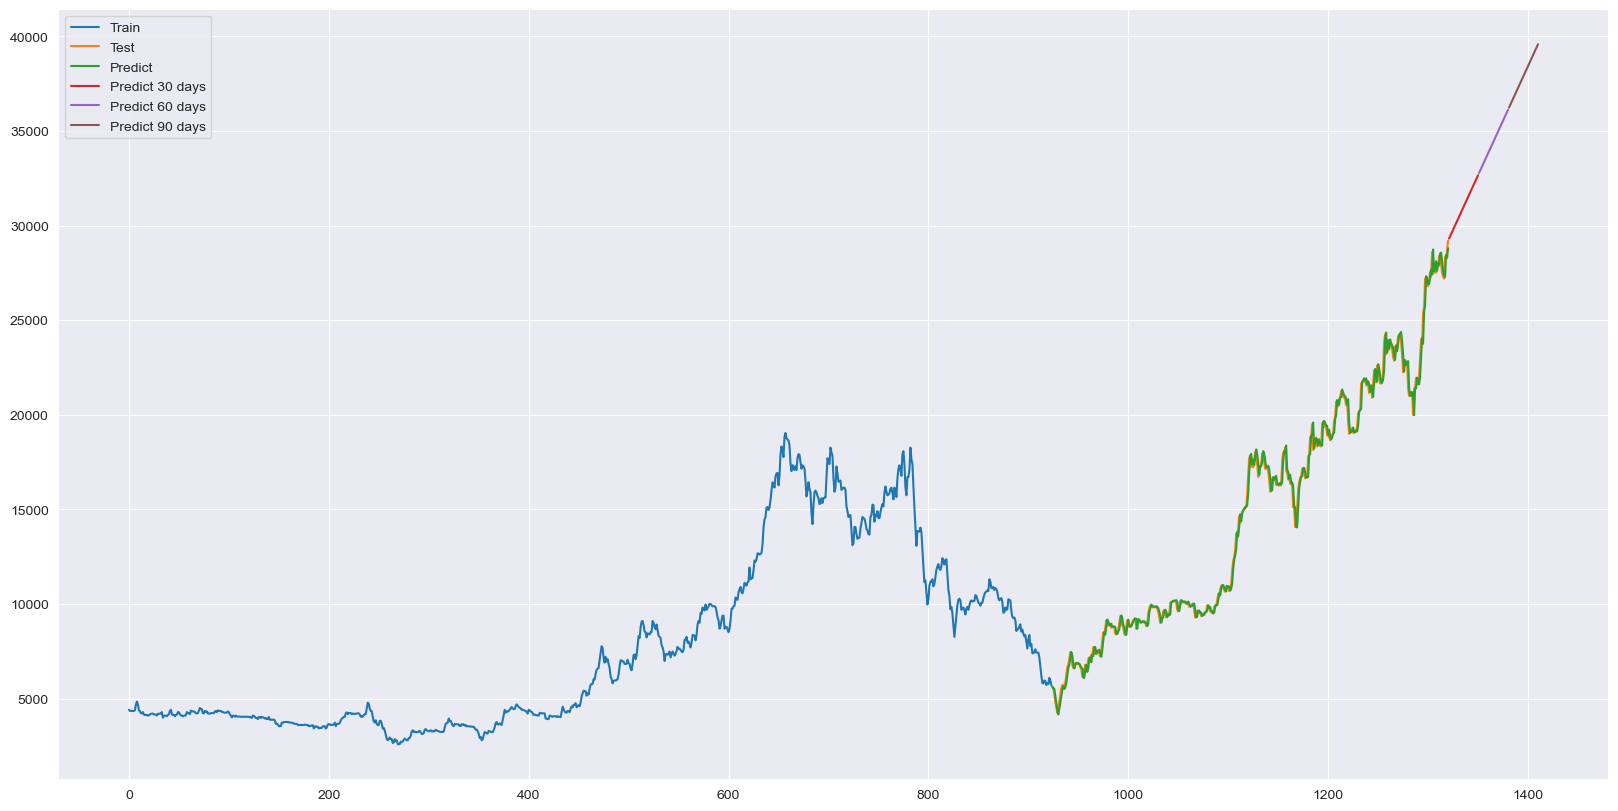

In [21]:
# Import các thư viện cần thiết
from sklearn.model_selection import train_test_split
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_log_error

# Đọc dữ liệu từ file CSV
data = pd.read_csv('D:\\Workspace\\23-24_HK2\\IS403-PTDLKD\\dataset\\ELC.csv')

# Lấy cột 'Close'
data1 = data.reset_index()['close']

# Chia train/test theo tỉ lệ 7:3
train_size = int(0.7 * len(data1))
test_size = len(data1) - train_size

train_data = data[:train_size]
test_data = data[train_size:]

# Convert train_data to numpy array
y_train = np.array(data['close'])

# Fit Exponential Smoothing model (Holt-Winters Additive)
model = ExponentialSmoothing(y_train, seasonal_periods=7, trend='add')
fit_model = model.fit()

# Make predictions for test_data
test_predictions = fit_model.predict(start=test_data.index[0], end=test_data.index[-1])

# Make predictions for the next 30, 60, 90 days
future_predictions_30 = fit_model.predict(start=data1.index[-1]+1, end=data1.index[-1]+30)
future_predictions_60 = fit_model.predict(start=data1.index[-1]+31, end=data1.index[-1]+60)
future_predictions_90 = fit_model.predict(start=data1.index[-1]+61, end=data1.index[-1]+90)

print("Future Predictions (30 days):", future_predictions_30)
print("Future Predictions (60 days):", future_predictions_60)
print("Future Predictions (90 days):", future_predictions_90)

# Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((test_predictions - test_data['close'])**2))
print('Testing RMSE:', test_rmse)

# Đánh giá độ chính xác thuật toán bằng MAE
test_mae = np.mean(np.abs(test_predictions - test_data['close']))
print('Testing MAE:', test_mae)

# Đánh giá độ chính xác thuật toán bằng MAPE
test_mape = np.mean(np.abs((test_predictions - test_data['close']) / test_data['close'])) * 100
print('Testing MAPE:', test_mape)

# Đánh giá độ chính xác thuật toán bằng MLSE
test_mlse = mean_squared_log_error(test_data['close'], test_predictions)
print('Testing MLSE:', test_mlse)

# Vẽ hình
plt.figure(figsize=(20,10))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data['close'], label='Train')
test_data_index = pd.RangeIndex(start=train_size, stop=len(data), step=1)
plt.plot(test_data_index, test_data['close'], label='Test')
plt.plot(test_data_index, test_predictions, label='Predict')

# Vẽ dự đoán cho 30 ngày tiếp theo
predict_data_index_30 = pd.RangeIndex(start=len(data), stop=len(data)+30, step=1)
plt.plot(predict_data_index_30, future_predictions_30, label='Predict 30 days')

# Vẽ dự đoán cho 60 ngày tiếp theo
predict_data_index_60 = pd.RangeIndex(start=len(data)+30, stop=len(data)+60, step=1)
plt.plot(predict_data_index_60, future_predictions_60, label='Predict 60 days')

# Vẽ dự đoán cho 90 ngày tiếp theo
predict_data_index_90 = pd.RangeIndex(start=len(data)+60, stop=len(data)+90, step=1)
plt.plot(predict_data_index_90, future_predictions_90, label='Predict 90 days')

plt.legend()
plt.show()


# (Split 8/2)

C:\Users\LENOVO\anaconda3\envs\python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Future Predictions (30 days): [29313.42740125 29428.77302391 29544.11864658 29659.46426924
 29774.8098919  29890.15551456 30005.50113723 30120.84675989
 30236.19238255 30351.53800522 30466.88362788 30582.22925054
 30697.5748732  30812.92049587 30928.26611853 31043.61174119
 31158.95736386 31274.30298652 31389.64860918 31504.99423185
 31620.33985451 31735.68547717 31851.03109983 31966.3767225
 32081.72234516 32197.06796782 32312.41359049 32427.75921315
 32543.10483581 32658.45045847]
Future Predictions (60 days): [32773.79608114 32889.1417038  33004.48732646 33119.83294913
 33235.17857179 33350.52419445 33465.86981711 33581.21543978
 33696.56106244 33811.9066851  33927.25230777 34042.59793043
 34157.94355309 34273.28917575 34388.63479842 34503.98042108
 34619.32604374 34734.67166641 34850.01728907 34965.36291173
 35080.70853439 35196.05415706 35311.39977972 35426.74540238
 35542.09102505 35657.43664771 35772.78227037 35888.12789303
 36003.4735157  36118.81913836]
Future Predictions (90 

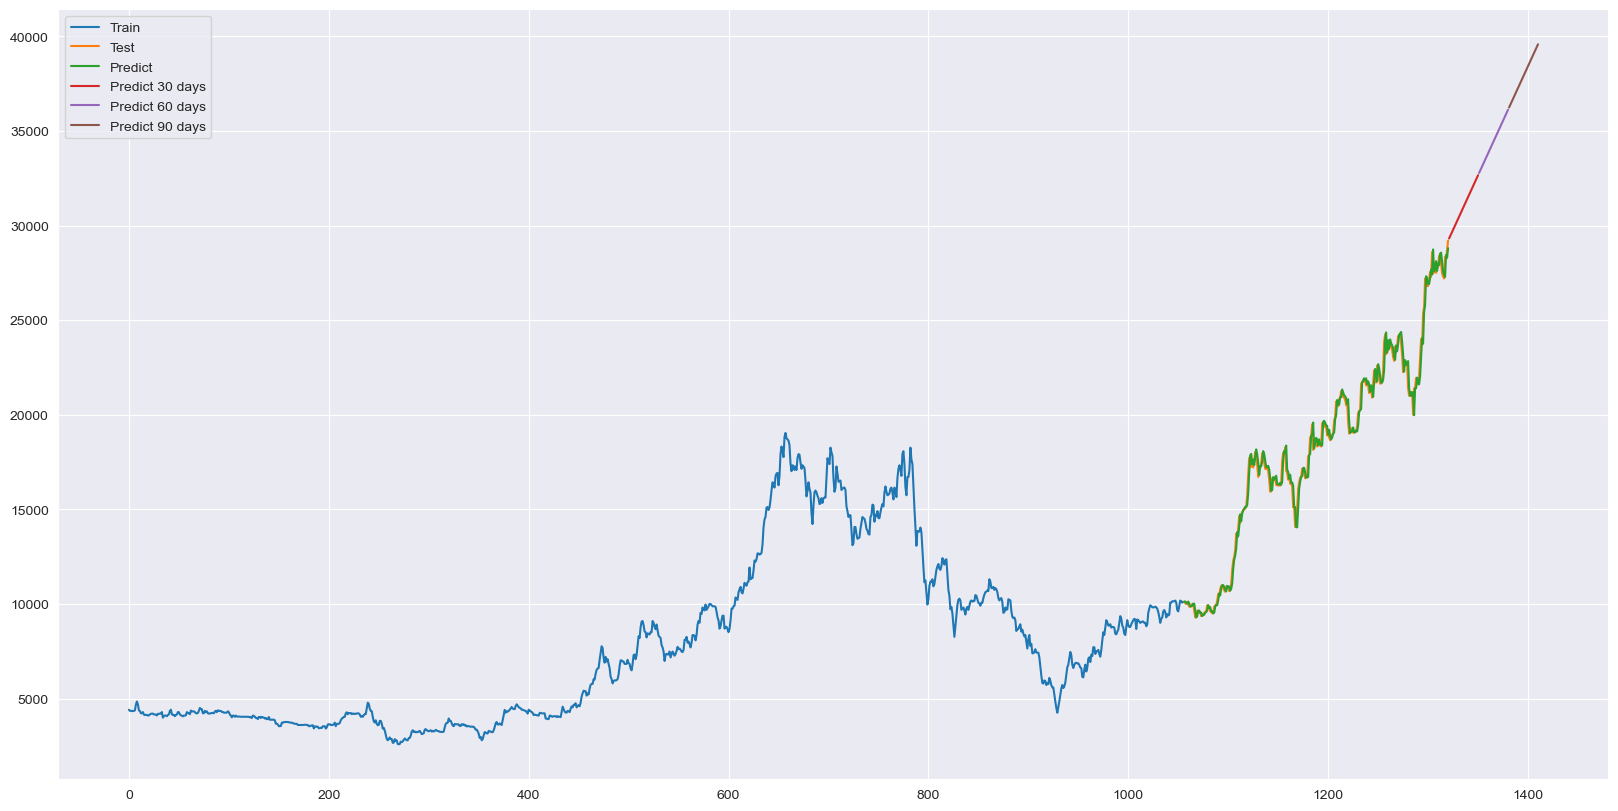

In [20]:
# Import các thư viện cần thiết
from sklearn.model_selection import train_test_split
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_log_error

# Đọc dữ liệu từ file CSV
data = pd.read_csv('D:\\Workspace\\23-24_HK2\\IS403-PTDLKD\\dataset\\ELC.csv')

# Lấy cột 'Close'
data1 = data.reset_index()['close']

# Chia train/test theo tỉ lệ
train_size = int(0.8 * len(data1))
test_size = len(data1) - train_size

train_data = data[:train_size]
test_data = data[train_size:]

# Convert train_data to numpy array
y_train = np.array(data['close'])

# Fit Exponential Smoothing model (Holt-Winters Additive)
model = ExponentialSmoothing(y_train, seasonal_periods=7, trend='add')
fit_model = model.fit()

# Make predictions for test_data
test_predictions = fit_model.predict(start=test_data.index[0], end=test_data.index[-1])

# Make predictions for the next 30, 60, 90 days
future_predictions_30 = fit_model.predict(start=data1.index[-1]+1, end=data1.index[-1]+30)
future_predictions_60 = fit_model.predict(start=data1.index[-1]+31, end=data1.index[-1]+60)
future_predictions_90 = fit_model.predict(start=data1.index[-1]+61, end=data1.index[-1]+90)

print("Future Predictions (30 days):", future_predictions_30)
print("Future Predictions (60 days):", future_predictions_60)
print("Future Predictions (90 days):", future_predictions_90)

# Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((test_predictions - test_data['close'])**2))
print('Testing RMSE:', test_rmse)

# Đánh giá độ chính xác thuật toán bằng MAE
test_mae = np.mean(np.abs(test_predictions - test_data['close']))
print('Testing MAE:', test_mae)

# Đánh giá độ chính xác thuật toán bằng MAPE
test_mape = np.mean(np.abs((test_predictions - test_data['close']) / test_data['close'])) * 100
print('Testing MAPE:', test_mape)

# Đánh giá độ chính xác thuật toán bằng MLSE
test_mlse = mean_squared_log_error(test_data['close'], test_predictions)
print('Testing MLSE:', test_mlse)

# Vẽ hình
plt.figure(figsize=(20,10))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data['close'], label='Train')
test_data_index = pd.RangeIndex(start=train_size, stop=len(data), step=1)
plt.plot(test_data_index, test_data['close'], label='Test')
plt.plot(test_data_index, test_predictions, label='Predict')

# Vẽ dự đoán cho 30 ngày tiếp theo
predict_data_index_30 = pd.RangeIndex(start=len(data), stop=len(data)+30, step=1)
plt.plot(predict_data_index_30, future_predictions_30, label='Predict 30 days')

# Vẽ dự đoán cho 60 ngày tiếp theo
predict_data_index_60 = pd.RangeIndex(start=len(data)+30, stop=len(data)+60, step=1)
plt.plot(predict_data_index_60, future_predictions_60, label='Predict 60 days')

# Vẽ dự đoán cho 90 ngày tiếp theo
predict_data_index_90 = pd.RangeIndex(start=len(data)+60, stop=len(data)+90, step=1)
plt.plot(predict_data_index_90, future_predictions_90, label='Predict 90 days')

plt.legend()
plt.show()


# (Split 9/1)

C:\Users\LENOVO\anaconda3\envs\python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Future Predictions (30 days): [29313.42740125 29428.77302391 29544.11864658 29659.46426924
 29774.8098919  29890.15551456 30005.50113723 30120.84675989
 30236.19238255 30351.53800522 30466.88362788 30582.22925054
 30697.5748732  30812.92049587 30928.26611853 31043.61174119
 31158.95736386 31274.30298652 31389.64860918 31504.99423185
 31620.33985451 31735.68547717 31851.03109983 31966.3767225
 32081.72234516 32197.06796782 32312.41359049 32427.75921315
 32543.10483581 32658.45045847]
Future Predictions (60 days): [32773.79608114 32889.1417038  33004.48732646 33119.83294913
 33235.17857179 33350.52419445 33465.86981711 33581.21543978
 33696.56106244 33811.9066851  33927.25230777 34042.59793043
 34157.94355309 34273.28917575 34388.63479842 34503.98042108
 34619.32604374 34734.67166641 34850.01728907 34965.36291173
 35080.70853439 35196.05415706 35311.39977972 35426.74540238
 35542.09102505 35657.43664771 35772.78227037 35888.12789303
 36003.4735157  36118.81913836]
Future Predictions (90 

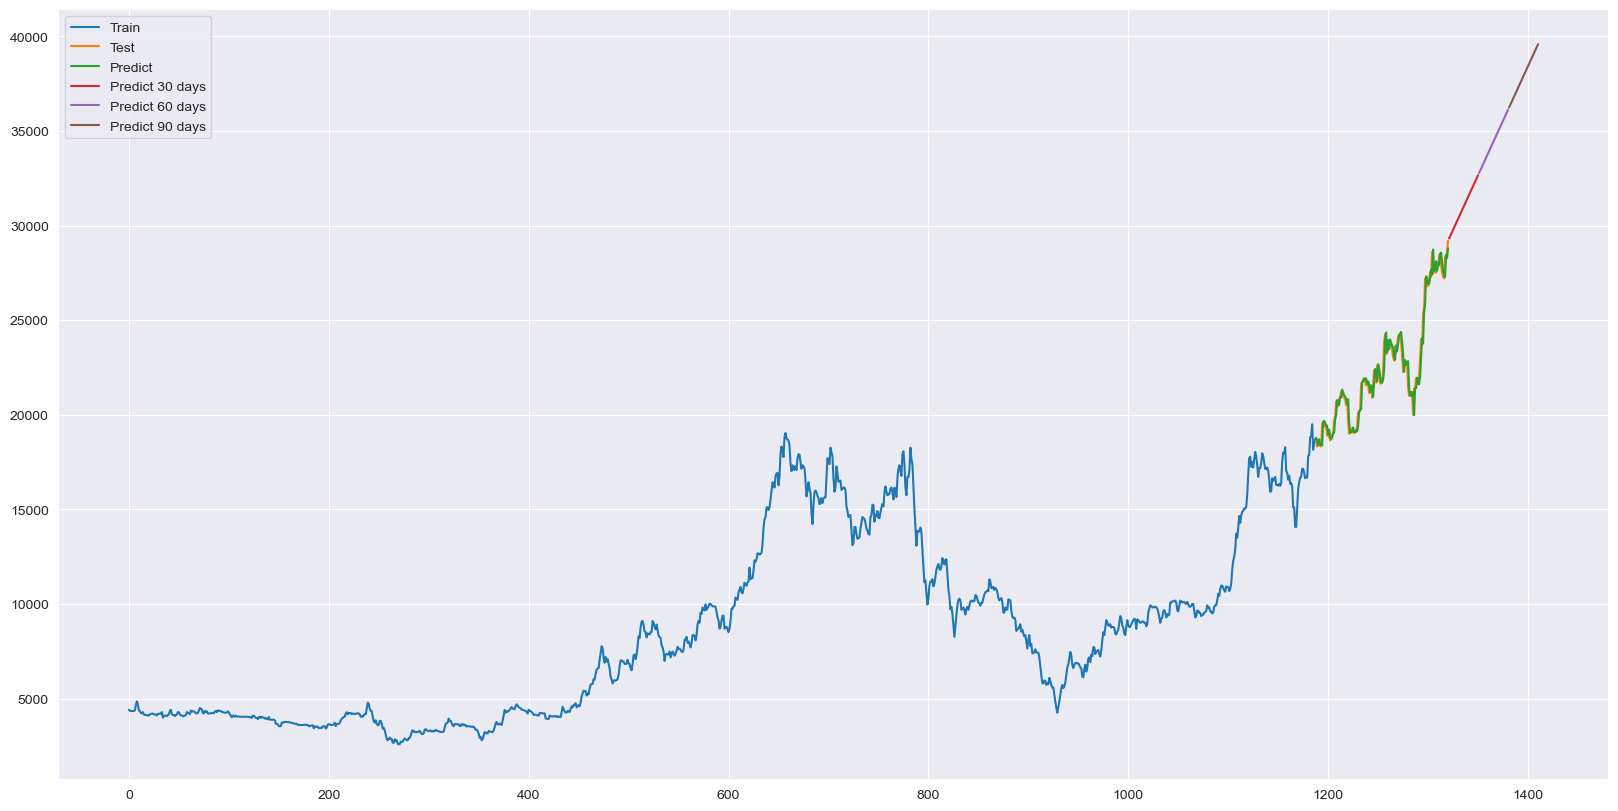

In [16]:
# Import các thư viện cần thiết
from sklearn.model_selection import train_test_split
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_log_error

# Đọc dữ liệu từ file CSV
data = pd.read_csv('D:\\Workspace\\23-24_HK2\\IS403-PTDLKD\\dataset\\ELC.csv')

# Lấy cột 'Close'
data1 = data.reset_index()['close']

# Chia train/test theo tỉ lệ 
train_size = int(0.9 * len(data1))
test_size = len(data1) - train_size

train_data = data[:train_size]
test_data = data[train_size:]

# Convert train_data to numpy array
y_train = np.array(data['close'])

# Fit Exponential Smoothing model (Holt-Winters Additive)
model = ExponentialSmoothing(y_train, seasonal_periods=7, trend='add')
fit_model = model.fit()

# Make predictions for test_data
test_predictions = fit_model.predict(start=test_data.index[0], end=test_data.index[-1])

# Make predictions for the next 30, 60, 90 days
future_predictions_30 = fit_model.predict(start=data1.index[-1]+1, end=data1.index[-1]+30)
future_predictions_60 = fit_model.predict(start=data1.index[-1]+31, end=data1.index[-1]+60)
future_predictions_90 = fit_model.predict(start=data1.index[-1]+61, end=data1.index[-1]+90)

print("Future Predictions (30 days):", future_predictions_30)
print("Future Predictions (60 days):", future_predictions_60)
print("Future Predictions (90 days):", future_predictions_90)

# Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((test_predictions - test_data['close'])**2))
print('Testing RMSE:', test_rmse)

# Đánh giá độ chính xác thuật toán bằng MAE
test_mae = np.mean(np.abs(test_predictions - test_data['close']))
print('Testing MAE:', test_mae)

# Đánh giá độ chính xác thuật toán bằng MAPE
test_mape = np.mean(np.abs((test_predictions - test_data['close']) / test_data['close'])) * 100
print('Testing MAPE:', test_mape)

# Đánh giá độ chính xác thuật toán bằng MLSE
test_mlse = mean_squared_log_error(test_data['close'], test_predictions)
print('Testing MLSE:', test_mlse)

# Vẽ hình
plt.figure(figsize=(20,10))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data['close'], label='Train')
test_data_index = pd.RangeIndex(start=train_size, stop=len(data), step=1)
plt.plot(test_data_index, test_data['close'], label='Test')
plt.plot(test_data_index, test_predictions, label='Predict')

# Vẽ dự đoán cho 30 ngày tiếp theo
predict_data_index_30 = pd.RangeIndex(start=len(data), stop=len(data)+30, step=1)
plt.plot(predict_data_index_30, future_predictions_30, label='Predict 30 days')

# Vẽ dự đoán cho 60 ngày tiếp theo
predict_data_index_60 = pd.RangeIndex(start=len(data)+30, stop=len(data)+60, step=1)
plt.plot(predict_data_index_60, future_predictions_60, label='Predict 60 days')

# Vẽ dự đoán cho 90 ngày tiếp theo
predict_data_index_90 = pd.RangeIndex(start=len(data)+60, stop=len(data)+90, step=1)
plt.plot(predict_data_index_90, future_predictions_90, label='Predict 90 days')

plt.legend()
plt.show()
